# DS Nanodegree Project: Write A Data Science Blog Post


## Stack Overflow Data - 2017 Survey Analysis

    Being an aspiring Data Scientist, Stack Overflow is a website that I refer to every single day because how it helps to solve your programming problems where people from around the globe can comment on it and help optimize it. In this project we will be using a dataset which holds survey results.
    
#### Contents of the notebook

- Relevant research question formulation
- Importing / Gathering Data
- Data Preparation
- Analysis and Visualization 


##### Relevant Research Questions

I am an international student based in United States. I want to explore the differences between Western country trends (North America, Europe) and Eastern country trends.

    1) What are the Salary differences in western countries and eastern countries, roughly?
    2) Are people Overpaid or not, globally? 
    3) Are people satisfied with their job?

With all those questions answered, Where will you prefer to work?


##### Importing / Gathering Data

Let's start by importing our data 


In [2]:
# importing important libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display

# Adjust some settings
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)
sns.set_style(style='darkgrid')
warnings.filterwarnings("ignore")
%matplotlib inline



In [3]:
df = pd.read_csv('survey-results-public.csv')

df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

Let us work around the imported dataset to know it better

In [4]:
df.tail()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
51387,51388,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,A social science,A few days each month,100 to 499 employees,I don't know,6 to 7 years,1 to 2 years,NaN,Web developer; Developer with a statistics or ...,NaN,NaN,NaN,7.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Agree,Strongly agree,Somewhat agree,Strongly agree,Strongly agree,Agree,Strongly disagree,Disagree,Agree,Agree,Strongly agree,Somewhat agree,Somewhat agree,Agree,Disagree,Somewhat agree,I am actively looking for a job,5.0,Between 1 and 2 years ago,Important,Somewhat important,Important,Somewhat important,Important,Not very important,Very important,Somewhat important,Somewhat important,Somewhat important,Important,Very important,Very important,Somewhat important,Important,Vacation/days off; Health benefits; Private of...,Yes,LinkedIn,I saw an employer's advertisement,A general-purpose job board,Very important,Not very important,Important,Not very important,Not very important,Not very important,Not very important,Not very important,Not very important,Important,U.S. dollars ($),Greatly underpaid,Both,Somewhat important,Online course; Self-taught; Coding competition,Official documentation; Stack Overflow Q&A; No...,NaN,Take online courses; Part-time/evening cours

In [5]:
df.shape

(51392, 154)

We can see that there are 154 attributes (quite a large dataset) with around 51392 data points. 

- We will start by writing a generalized function which will be used for plotting various kinds of data and will help us better understand the data.

In [6]:
def plot_column_data(df, coln, title):
    '''
    This function will give a bar chart as output for provided column with a title that is provided by user.
    
    parameters:
    df: the data which is to be used.
    coln: name of the column that is to be plotted
    title: title of the plot
    
    Returns:
    A bar plot of percentage share 
    '''
    used_coln = ['Professional', 'Country', 'EmploymentStatus', 'Overpaid']
    if coln in used_coln :
        vals = df[coln].value_counts()
        (vals[:5]/df.shape[0]).plot(kind="bar");
        plt.title(title);
    
    else:
        display('Please enter a column name from Professional, Country, EmploymentStatus, Overpaid ')
        
    

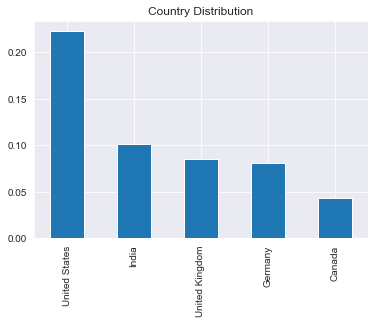

In [7]:
# Lets try to understand the countries of the reviewers

plot_column_data(df, "Country", "Country Distribution")

We see that around 22% of reviewers live in United States, followed by India at 10% and UK,Germany and Canada.


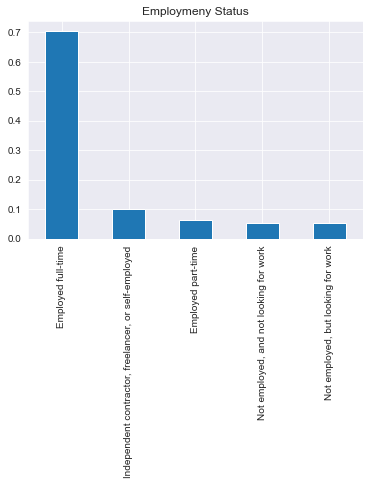

In [8]:
# Lets try to understand the Employment Status of the reviewers

plot_column_data(df, "EmploymentStatus", "Employmeny Status")

70% people are employed full-time and with other categories less than 10%

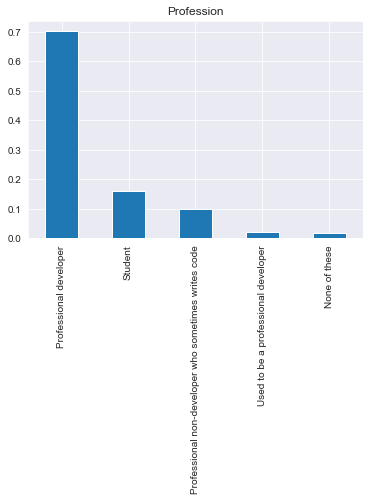

In [9]:
# Lets try to understand the Professional of the reviewers

plot_column_data(df, "Professional", "Profession")

Around 70% of people on stack Overflow are Professional Developers

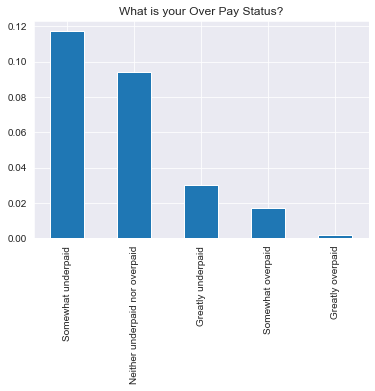

In [10]:
# Lets try to understand the Over Pay Status of the reviewers

plot_column_data(df, "Overpaid", "What is your Over Pay Status?")

11.5% are somewhat underpaid. Infact, in general more people are underpaid than those that are overpaid.

Now let us also try plotting a column which was not definded in function.

In [11]:
plot_column_data(df, "University", "Which University do they study in?")

'Please enter a column name from Professional, Country, EmploymentStatus, Overpaid '

##### Data Preparation

Since we are comparing trends of western and eastern countries, first let us programatically split countries into western and eastern division. The data does not provide us that data, so we will manually specify the countries.

In [12]:
df.Country.value_counts()

United States                     11455
India                              5197
United Kingdom                     4395
Germany                            4143
Canada                             2233
France                             1740
Poland                             1290
Australia                           913
Russian Federation                  873
Spain                               864
Netherlands                         855
Italy                               781
Brazil                              777
Sweden                              611
Switzerland                         595
Israel                              575
Romania                             561
Iran                                507
Austria                             477
Pakistan                            454
Czech Republic                      411
Belgium                             404
South Africa                        380
Turkey                              363
Ukraine                             356


In [13]:
def country_div(df):
    '''
    Returns a dataframe with a column created denoting western or eastern division.
    
    Parameter: 
    df: a raw dataframe
    
    Returns:
    df: same dataframe with added column denoting western and eastern division.
    
    '''
    
    # Let's start by specifying western and eastern countries in a list, manually.
    
    eastern = ['India','China','Australia','Russian Federation','Isreal','Iran','Pakistan','Turkey','Philippines',
               'Indonesia','New Zealand','Japan','Serbia','Malaysia','Bangladesh','Singapore']
    
    western = ['United States','United Kingdom','Germany','Canada','France','Poland','Spain','Netherlands','Italy',
              'Brazil','Sweden','Switzerland','Austria','Belgium','South Africa','Mexico','Ireland','Hungary',
              'Denmark','Greece','Finland']
    
    # Now add a column using the above lists
    df['division'] = df['Country'].apply(lambda x: 'eastern' if x in eastern else ('western' if x in western else 'other'))
    
    display(df.head())
    
    return df



In [14]:
df = country_div(df)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,division
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS ap

We know that there are around 154 columns and most of them are not really useful. So let us extract the columns that are useful to our analysis. Here are some columns that might be useful for our analysis. 

- Country: The country where reviewer lives
- EmployemntStatus: The employment status of reviewer
- YearsCodedJob: Time (in years) they have been coding
- Salary: Their salary
- JobSatisfaction & CareerSatisfaction: Are the reviewers satified with their job and career or not?
- Overpaid: How overpaid is the reviewer?
- HaveWorkedLanguage: The languages they have worked with.

Also let us focus on full-time employment data

In [15]:
def data_prep(df):
    '''
    Returns a df with columns of our interest.
    
    Parameters:
    df: raw dataframe
    
    Returns:
    df_useful: dataframe from raw df with only useful features.
    
    '''
    
    useful_cols = ['Country', 'EmploymentStatus','YearsCodedJob','Salary','JobSatisfaction','CareerSatisfaction',
                  'JobSeekingStatus', 'HoursPerWeek','division', 'Overpaid']
    
    df_1 = pd.DataFrame(df.query("EmploymentStatus == 'Employed full-time'"))[useful_cols]
    
    display(df_1.head())
    return df_1



In [16]:
df.HaveWorkedLanguage.value_counts().head(20)

C#; JavaScript; SQL                1276
JavaScript; PHP; SQL               1143
Java                                913
JavaScript                          807
JavaScript; PHP                     662
Java; JavaScript; SQL               645
Java; JavaScript                    585
C#                                  540
Python                              529
C#; JavaScript                      500
C#; SQL                             494
C#; JavaScript; SQL; TypeScript     410
JavaScript; Python                  384
Java; SQL                           356
Java; JavaScript; PHP; SQL          342
C#; JavaScript; PHP; SQL            256
JavaScript; PHP; Python; SQL        253
C++                                 247
C#; Java; JavaScript; SQL           230
PHP                                 217
Name: HaveWorkedLanguage, dtype: int64

In [17]:
df_1 = data_prep(df)

,Country,EmploymentStatus,YearsCodedJob,Salary,JobSatisfaction,CareerSatisfaction,JobSeekingStatus,HoursPerWeek,division,Overpaid
2,United Kingdom,Employed full-time,20 or more years,113750.0,9.0,8.0,NaN,NaN,western,Neither underpaid nor overpaid
3,United States,Employed full-time,9 to 10 years,NaN,3.0,6.0,I am actively looking for a job,5.0,western,NaN
4,Switzerland,Employed full-time,10 to 11 years,NaN,8.0,6.0,NaN,NaN,western,NaN
6,United States,Employed full-time,8 to 9 years,NaN,6.0,7.0,"I'm not actively looking, but I am open to new...",1.0,western,NaN
7,Poland,Employed full-time,7 to 8 years,NaN,7.0,7.0,"I'm not actively looking, but I am open to new...",1.0,western,NaN


In [18]:
df_1.division.unique()

array(['western', 'other', 'eastern'], dtype=object)

We have our data in place with all the necessary columns for our analysis. But, we see that some columns are not in the format that we desire for inferential analysis.

- The Overpaid column is a categorical with object data type. I feel converting it to a numerical category will make sense for our analysis.

Here we convert Overpaid column into a numerical categories.

In [19]:
def overpaid_conv(df):
    '''
    
    This function returns the same dataframe with Overpaid column in numerical format.
    
    
    Parameters: 
    df: the df_1 will be passed as parameter
    
    Returns:
    df_1: the same dataframe with Overpaid column converted into numerical categories.
    
    '''
    
    overpaid_map = {
        'Greatly underpaid' : 1,
        'Somewhat underpaid' : 2,
        'Neither underpaid nor overpaid' : 3,
        'Somewhat overpaid' : 4,
        'Greatly overpaid' : 5,
        np.nan: np.nan
    }
    df['Overpaid'] = df['Overpaid'].apply(lambda x: np.nan if x == np.nan else overpaid_map[x] )
    
    display(df.head())
    
    return df

In [20]:
# lets do a function call and perform the necessary operation to convert overpaid column into numerical format

df_1 = overpaid_conv(df_1)

q1 = df_1.groupby(['division','YearsCodedJob']).mean()
q1

,Country,EmploymentStatus,YearsCodedJob,Salary,JobSatisfaction,CareerSatisfaction,JobSeekingStatus,HoursPerWeek,division,Overpaid
2,United Kingdom,Employed full-time,20 or more years,113750.0,9.0,8.0,NaN,NaN,western,3.0
3,United States,Employed full-time,9 to 10 years,NaN,3.0,6.0,I am actively looking for a job,5.0,western,NaN
4,Switzerland,Employed full-time,10 to 11 years,NaN,8.0,6.0,NaN,NaN,western,NaN
6,United States,Employed full-time,8 to 9 years,NaN,6.0,7.0,"I'm not actively looking, but I am open to new...",1.0,western,NaN
7,Poland,Employed full-time,7 to 8 years,NaN,7.0,7.0,"I'm not actively looking, but I am open to new...",1.0,western,NaN


Salary  JobSatisfaction  CareerSatisfaction  \
division YearsCodedJob                                                          
eastern  1 to 2 years       10975.851467         6.000000            6.627419   
         10 to 11 years     38954.557683         6.727273            7.327684   
         11 to 12 years     43512.961806         6.797753            7.191011   
         12 to 13 years     52038.604875         6.925926            7.382716   
         13 to 14 years     53160.580357         6.705882            6.843137   
         14 to 15 years     57948.411586         6.794521            7.067568   
         15 to 16 years     56957.007437         6.819444            7.111111   
         16 to 17 years     58415.002742         7.270833            7.458333   
         17 to 18 years     74674.590186         7.086957            7.255319   
         18 to 19 years     68142.660952         7.450000            7.250000   
         19 to 20 years     51794.620890         6.821429            7.137931   
         2 to 3 years       13192.955090         6.332375            6.865072   
         20 or more years   77494.105133         6.984375            7.496063   
         3 to 4 years       17786.735961         6.264557            6.878788   
         4 to 5 years       19285.341114         6.575758            6.969748   
         5 to 6 years       24470.390075         6.602386            7.097416   
         6 to 7 years       26382.885828         6.800000            7.127869   
         7 to 8 years       32250.322093         6.735537            7.157025   
         8 to 9 years       38098.921320         6.589928            7.115108   
         9 to 10 years      35621.406815         6.730942            7.263393   
         Less than a year   11863.344413         5.997080            6.318248   
other    1 to 2 years       17622.212483         6.704992            7.252976   
         10 to 11 years     49313.268882         7.041885            7.675393   
         11 to 12 years     56611.673223         7.400000            7.842105   
         12 to 13 years     47686.842027         7.128205            7.461538   
         13 to 14 years     55022.154432         7.553846            8.169231   
         14 to 15 years     62963.576724         7.507042            7.549296   
         15 to 16 years     56699.308509         7.457143            7.557143   
         16 to 17 years     50661.203043         7.425926            7.629630   
         17 to 18 years     58198.182385         7.536585            7.512195   
         18 to 19 years     61116.105881         7.709677            7.774194   
         19 to 20 years     28927.637315         7.444444            7.592593   
         2 to 3 years       23259.893810         6.814935            7.336570   
         20 or more years   64383.628823         7.585526            7.875817   
         3 to 4 years       20822.604412         6.813830            7.322124   
         4 to 5 years       26539.542576         6.896328            7.451404   
         5 to 6 years       33259.397482         6.923664            7.318987   
         6 to 7 years       37351.750851         6.762500            7.393305   
         7 to 8 years       38885.072197         6.980583            7.545894   
         8 to 9 years       38628.365308         6.953333            7.733333   
         9 to 10 years      35620.252152         7.195455            7.554545   
         Less than a year   14603.183505         6.682216            7.061224   
western  1 to 2 years       45997.990903         7.062527            7.470308   
         10 to 11 years     73678.586374         7.124266            7.455969   
         11 to 12 years     77079.181724         7.011628            7.500000   
         12 to 13 years     90733.797524         6.971554            7.518600   
         13 to 14 years     80143.821902         6.940994            7.297214   
         14 to 15 years     88086.585857         7.005825        

We can see how the data when grouped by divisions and then YearsCodedJob further into various categories. Those categories are a bit abrupt since the intervals are misleading. Let us try and improve it.

In [21]:
def years_code(df):
    '''
    
    This will manage the YearsCodedJob column to normalized labels so they are not misleading.
    
    Parameters:
    df: the dataframe that has the column YearsCodedJob and needs change
    
    Returns:
    df: the same dataframe that has the column YearsCodedJob changed to the way we want.
    
    '''
    
    map_year = {'1 to 2 years' : 1, 
                '10 to 11 years' : 10, 
                '11 to 12 years' : 11, 
                '12 to 13 years' : 12,
                '13 to 14 years' : 13, 
                '14 to 15 years' : 14, 
                '15 to 16 years' : 15, 
                '16 to 17 years' : 16,
                '17 to 18 years' : 17, 
                '18 to 19 years' : 18, 
                '19 to 20 years' : 19, 
                '2 to 3 years' : 2,
                '20 or more years' : 20, 
                '3 to 4 years' : 3, 
                '4 to 5 years' : 4, 
                '5 to 6 years' : 5, 
                '6 to 7 years' : 6, 
                '7 to 8 years' : 7, 
                '8 to 9 years' : 8, 
                '9 to 10 years' : 9, 
                'Less than a year' : 0}
    
    df_map = df.reset_index()
    df_map['YearsCodedJob'] = df_map['YearsCodedJob'].apply(lambda x: map_year[x])
    df_map['YearsCodedJob'] = pd.to_numeric(df_map['YearsCodedJob'])
    
    return df_map

In [22]:
q1_mapped = years_code(q1)
q1_mapped = q1_mapped.sort_values(by='YearsCodedJob')

In [23]:
q1_mapped.set_index('YearsCodedJob', inplace=True)

In [24]:
q1_mapped.head()

,division,Salary,JobSatisfaction,CareerSatisfaction,HoursPerWeek,Overpaid
YearsCodedJob,,,,,,
0,western,45216.168656,7.408195,7.525570,2.615789,2.493119
0,other,14603.183505,6.682216,7.061224,4.261194,2.210526
0,eastern,11863.344413,5.997080,6.318248,5.743860,2.457143
1,western,45997.990903,7.062527,7.470308,3.002210,2.364571
1,other,17622.212483,6.704992,7.252976,5.033898,2.302083



##### Analysis and Visualization

Now that we have our data prepared, we will use it to perform various visualization.

We will start by observing how Salary goes with the # of years coded to get a job and also grouped by division.

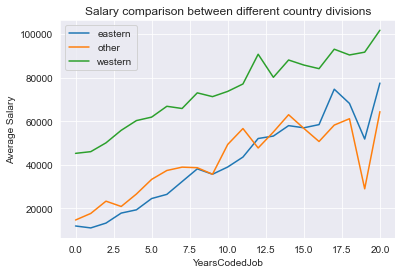

In [25]:

q1_mapped.groupby('division')['Salary'].plot(legend=True)
plt.title("Salary comparison between different country divisions");
plt.xlabel('YearsCodedJob');
plt.ylabel('Average Salary');

The observation that one can make from this visual is that, for any given amount of coding experience (in years) the western countries have higher salaries for employees. Now we can agrue this observation by considering the fact that we have neglected various other possible attributes that determines salary and hence, making this visual a naive one.

Reasons for western countries paying more could be because of higher standard of livings (in general) increasing overall expenses of individual.

The other correct observation is that with increase in coding experience (in years) the average salary increase which is a fairly correct assumption.


**Q2**

Now we will analyze if people are overpaid or not, in a global scene (i.e. division based)

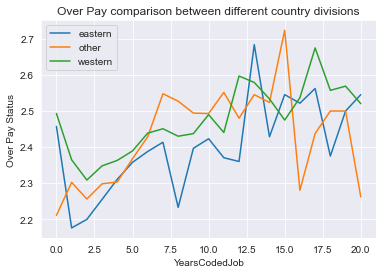

In [62]:
q1_mapped.groupby('division')['Overpaid'].plot(legend=True)
plt.title("Over Pay comparison between different country divisions");
plt.xlabel('YearsCodedJob');
plt.ylabel('Over Pay Status');

Let us split the above visual into 3 parts i.e. Entry level (0-5 years), Mid level (5-15 years), and Senior level (above 15 years). This will become a reasonal basis for our analysis since the results are abrupt and can't be generalized for all levels of experience.

- Entry level: One can observe that people in western countries are most overpaid while, the people in eastern countries like India and China feel they are least overpaid.

- Mid level: It is observed that the 'other' country category people feel they are most overpaid while eastern country people still feel that they are compensated less than what their market value is. The western country participants feel they are fairly overpaid during mid level of their career.

- Senior level: Once a participant is at senior level of its career, the people in western countries feel they are most overpaid. The eastern country people also feel they are overpaid better than 'other' country categories.

The discrepancy can be considered because the division of countries in categories of eastern, western and other are manually done by me hence, the actual scenario may vary on how the countries are split up.

**Q3**

#####  _Are people satisfied with their jobs and career?_

In [75]:
cor = df_1.corr()
cor

,YearsCodedJob,Salary,JobSatisfaction,CareerSatisfaction,HoursPerWeek,Overpaid
YearsCodedJob,1.000000,0.461859,0.063480,0.078306,-0.090662,0.092839
Salary,0.461859,1.000000,0.121130,0.161014,-0.122765,0.209559
JobSatisfaction,0.063480,0.121130,1.000000,0.650319,-0.092189,0.233988
CareerSatisfaction,0.078306,0.161014,0.650319,1.000000,-0.049264,0.179309
HoursPerWeek,-0.090662,-0.122765,-0.092189,-0.049264,1.000000,-0.030045
Overpaid,0.092839,0.209559,0.233988,0.179309,-0.030045,1.000000


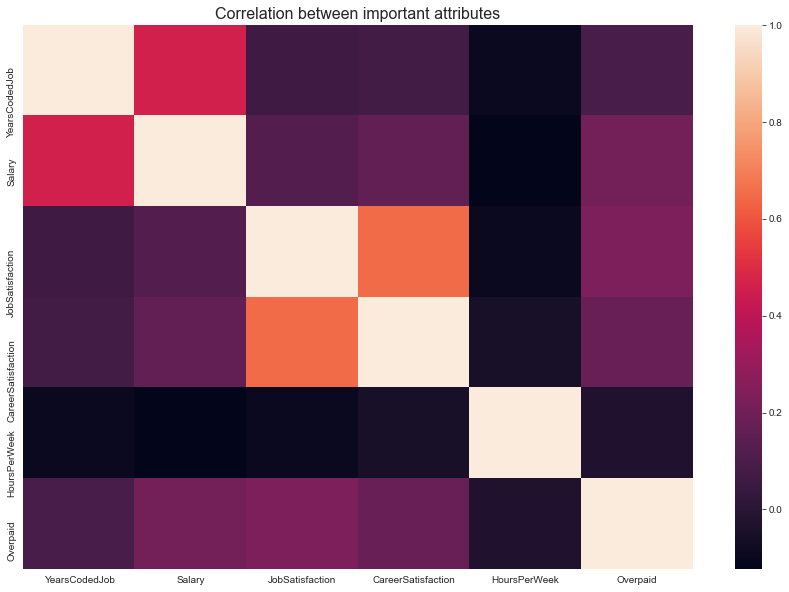

In [90]:
plt.figure(figsize=(15,10))
sns.heatmap(data=cor)
plt.title("Correlation between important attributes", size=16)

plt.show();

From the above heatmap, we can say that the attributes 'JobSatisfaction' and 'CareerSatisfaction' are highly correlated and that can be fairly correct because if one is content with their job, they are most likely to be satisfied in their career as well. This visual is based on overall reading from around the globe, which is a little abrupt for our analysis because we are focusing on trends on division basis. 

So let us try and visualize on division basis.


In [91]:
df_1.groupby('division').mean().JobSatisfaction

division
eastern    6.386417
other      6.939388
western    7.086506
Name: JobSatisfaction, dtype: float64

In [92]:
df_1.groupby('division').mean().CareerSatisfaction

division
eastern    6.863623
other      7.399102
western    7.492738
Name: CareerSatisfaction, dtype: float64

In [96]:
df_1.groupby('division').mean().Salary/100 # dividing by 100 just to bring down the scale of salary to fit on plot

division
eastern    244.266150
other      321.241217
western    669.331896
Name: Salary, dtype: float64

Text(0, 0.5, 'Career Satisfaction')

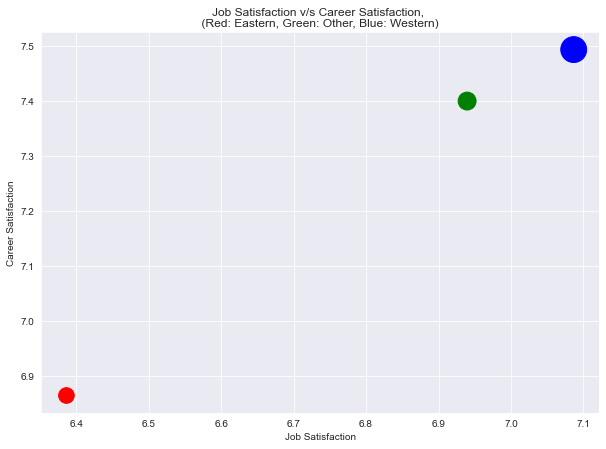

In [104]:
# Let us try and do a scatter plot
plt.figure(figsize=(10,7))
plt.scatter(df_1.groupby('division').mean().JobSatisfaction, df_1.groupby('division').mean().CareerSatisfaction, 
            df_1.groupby('division').mean().Salary/100,  c=['red','green','blue'])
plt.title('Job Satisfaction v/s Career Satisfaction, \n (Red: Eastern, Green: Other, Blue: Western) ')
plt.xlabel('Job Satisfaction')
plt.ylabel('Career Satisfaction')

- Although the plot looks like there is a big difference, but I would consider it as a little misleading since the scale starts at 6.something if it were absolutle scale (starting at 0) the visual would make the difference a little less visible. 
- The information that one can pull out of this visual is that people in Western countries are much more satisfied with their job and also with their career. 
- The reasoning behind it can be attributed to the fact that western countries are overpaid fairly, the jobs provide support in the form of health insurance coverage and other perks which countries of east and other category (which are not as developed as western countries) lack in providing.


### Conclusion

1) When comparing Salaries of people from different countries, western countries have highest salaries for their employees for all levels of experience. The other countries employees are paid a little more than eastern countries until they turn to senior levels of job experience. Once in the Senior level experience, the eastern country employees are paid more than their counterpart in other countries.

2) Let us split the above visual into 3 parts i.e. Entry level (0-5 years), Mid level (5-15 years), and Senior level (above 15 years). This will become a reasonal basis for our analysis since the results are abrupt and can't be generalized for all levels of experience.

    Entry level: One can observe that people in western countries are most overpaid while, the people in eastern countries like India and China feel they are least overpaid.

    Mid level: It is observed that the 'other' country category people feel they are most overpaid while eastern country people still feel that they are compensated less than what their market value is. The western country participants feel they are fairly overpaid during mid level of their career.

    Senior level: Once a participant is at senior level of its career, the people in western countries feel they are most overpaid. The eastern country people also feel they are overpaid better than 'other' country categories.

The discrepancy can be considered because the division of countries in categories of eastern, western and other are manually done by me hence, the actual scenario may vary on how the countries are split up.

3) Although the plot looks like there is a big difference, but I would consider it as a little misleading since the scale starts at 6.something if it were absolutle scale (starting at 0) the visual would make the difference a little less visible. 
- The information that one can pull out of this visual is that people in Western countries are much more satisfied with their job and also with their career. 
- The reasoning behind it can be attributed to the fact that western countries are overpaid fairly, the jobs provide support in the form of health insurance coverage and other perks which countries of east and other category (which are not as developed as western countries) lack in providing.
